# 그래프와 시각화

## matplotlib

In [5]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib notebook

In [6]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


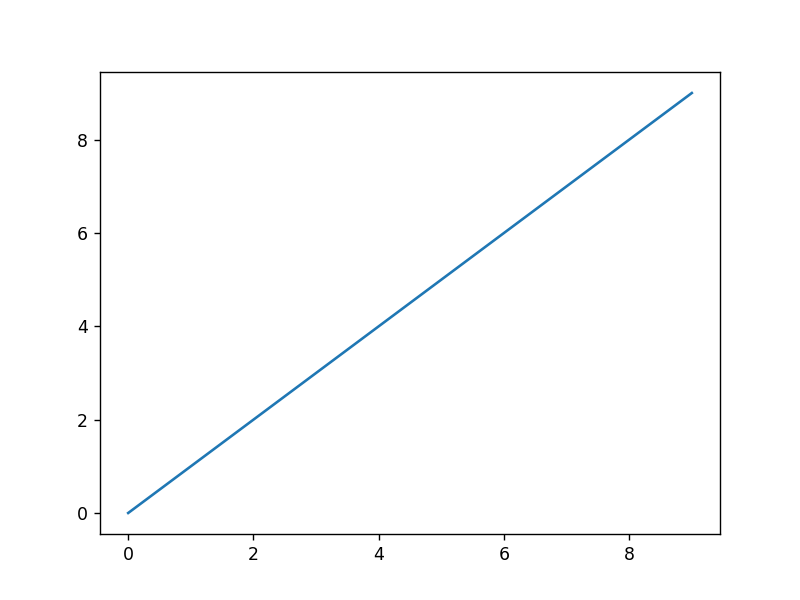

In [7]:
plt.plot(data)

### figure와 서브플롯

<IPython.core.display.Javascript object>


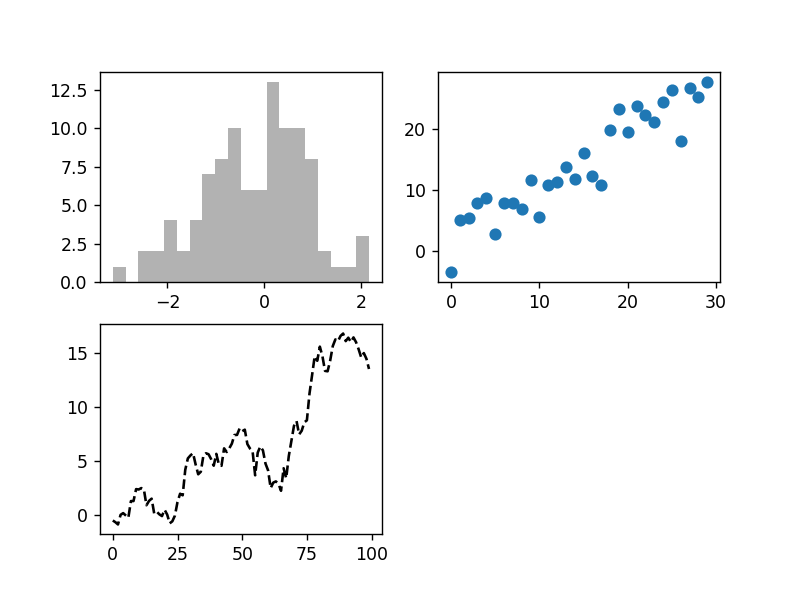

In [279]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

In [280]:
plt.plot(np.random.randn(100).cumsum(),'k--') # 가장 최근 서브플롯에 그려준다.

In [281]:
_ = ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30) + 3*np.random.randn(30))

<IPython.core.display.Javascript object>


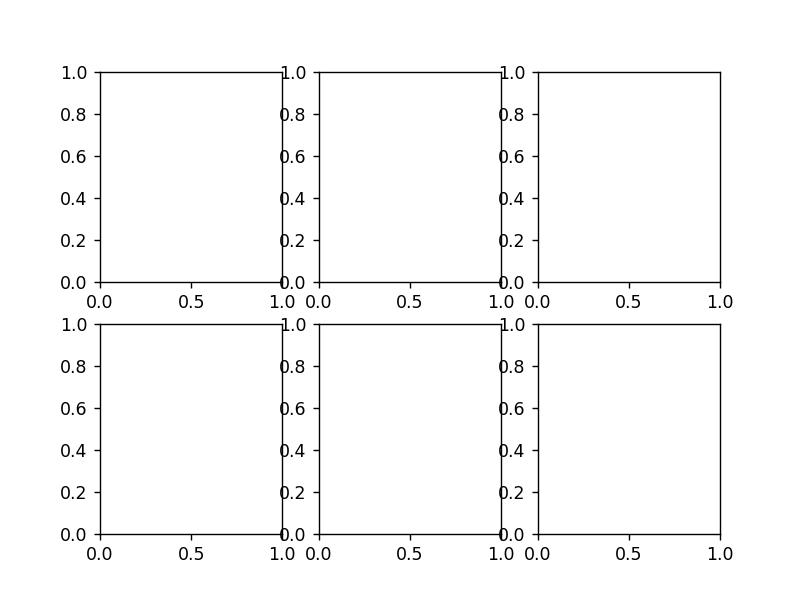

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C679C22FC8>,
      dtype=object)

In [282]:
fig, axes = plt.subplots(2,3)
axes

#### 서브플롯 간의 간격 조절

<IPython.core.display.Javascript object>


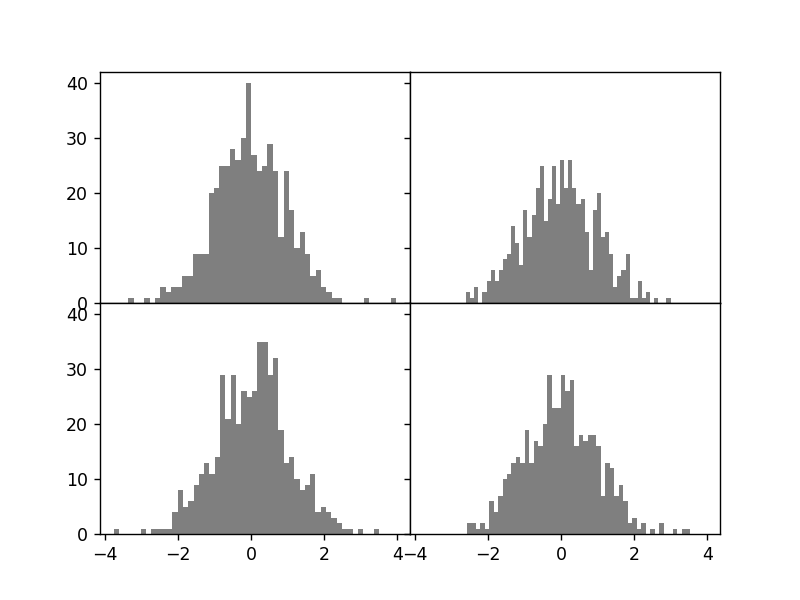

In [290]:
fig,axes= plt.subplots(2,2,sharex=True,sharey=True) # x,y 범위 통일
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0) # 간격을 주지 않고 생성

### 색상, 마커, 선 스타일

In [285]:
ax.plot(x,y,'g--') == ax.plot(x,y,linestyle = '--',color='g')

NameError: name 'ax' is not defined

In [286]:
from numpy.random import randn

<IPython.core.display.Javascript object>


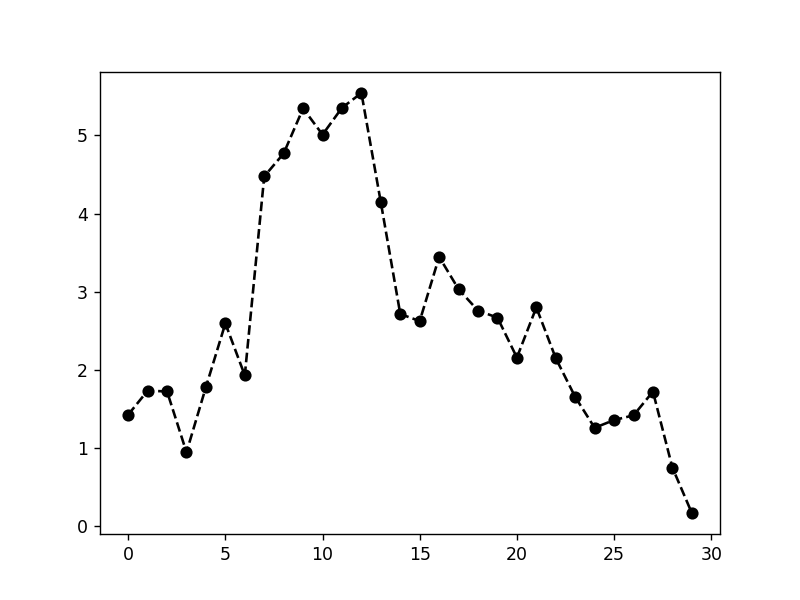

In [294]:
plt.figure()
plt.plot(randn(30).cumsum(),'ko--')

<IPython.core.display.Javascript object>


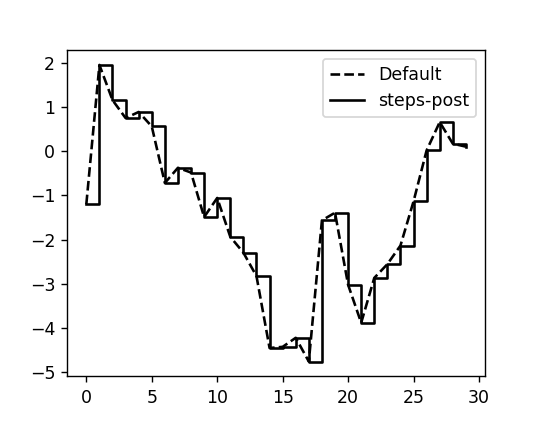

In [298]:
data = np.random.randn(30).cumsum()
plt.figure()
plt.plot(data,'k--',label='Default')
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best') # 범례호출

### 눈금, 라벨, 범례

<IPython.core.display.Javascript object>


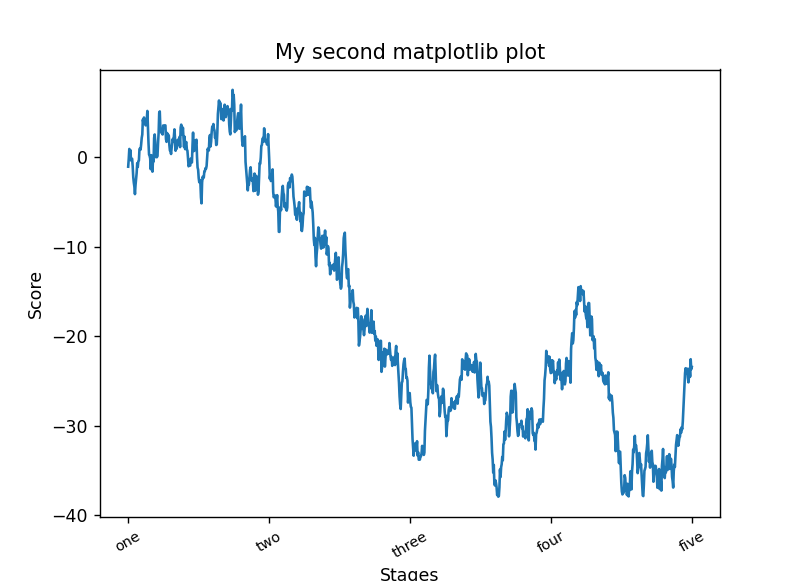

In [301]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

In [309]:
ticks = ax.set_xticks([0,250,500,750,1000]) # 표시할 눈금정하기
# 표시한 눈금의 이름 넣기
lables = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
# r그래프 이름 넣기
ax.set_title('My first matplotlib plot')
# x축 이름 넣기
ax.set_xlabel('Stages')

Text(0.5, 15.715922124795624, 'Stages')

In [313]:
props = {
    'title':'My second matplotlib plot'
    ,'ylabel':'Score'
    
}
ax.set(**props)

[Text(44.402777777777786, 0.5, 'Score'),
 Text(0.5, 1.0, 'My second matplotlib plot')]

<IPython.core.display.Javascript object>


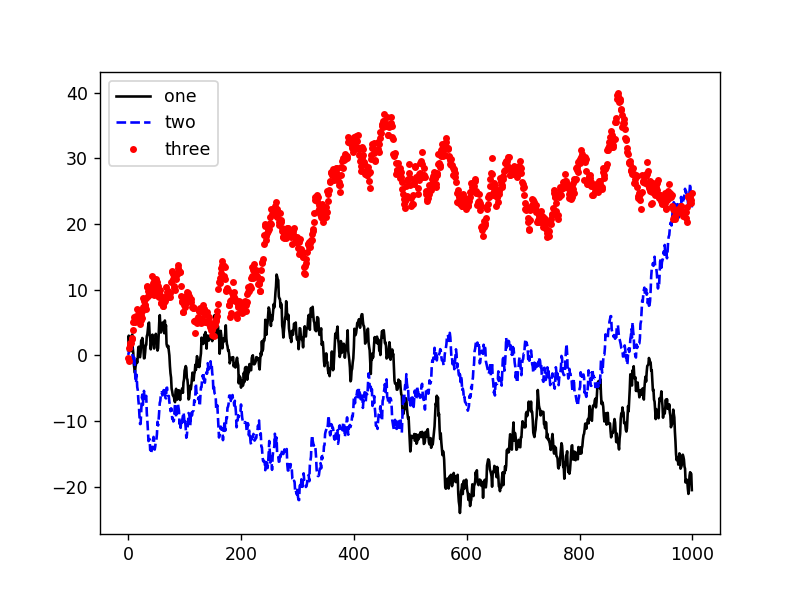

In [317]:
# 범례 넣기

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'b--',label='two')
ax.plot(randn(1000).cumsum(),'r.',label='three')
plt.legend(loc='best')

### 주석과 그림 추가하기

<IPython.core.display.Javascript object>


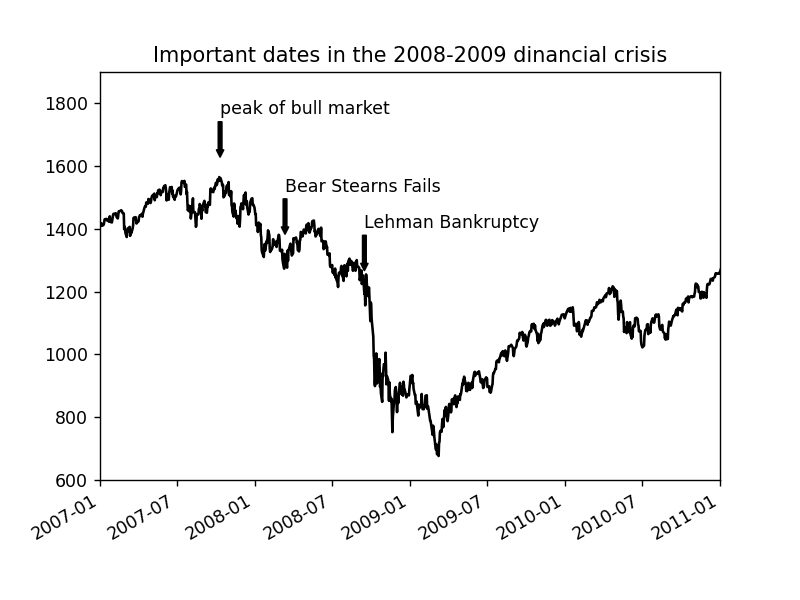

Text(0.5, 1.0, 'Important dates in the 2008-2009 dinancial crisis')

In [327]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('data/spx.csv',index_col=0,parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax,style='k-')

crisis_data = [
    (datetime(2007,10,11),'peak of bull market')
    ,(datetime(2008,3,12),'Bear Stearns Fails')
    ,(datetime(2008,9,15),'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy = (date,spx.asof(date)+75)
               ,xytext = (date, spx.asof(date)+255)
               ,arrowprops = dict(facecolor='black',headwidth=4,width=2,headlength=4)
                ,horizontalalignment = 'left',verticalalignment='top'
               )
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1900])

ax.set_title('Important dates in the 2008-2009 dinancial crisis')

<IPython.core.display.Javascript object>


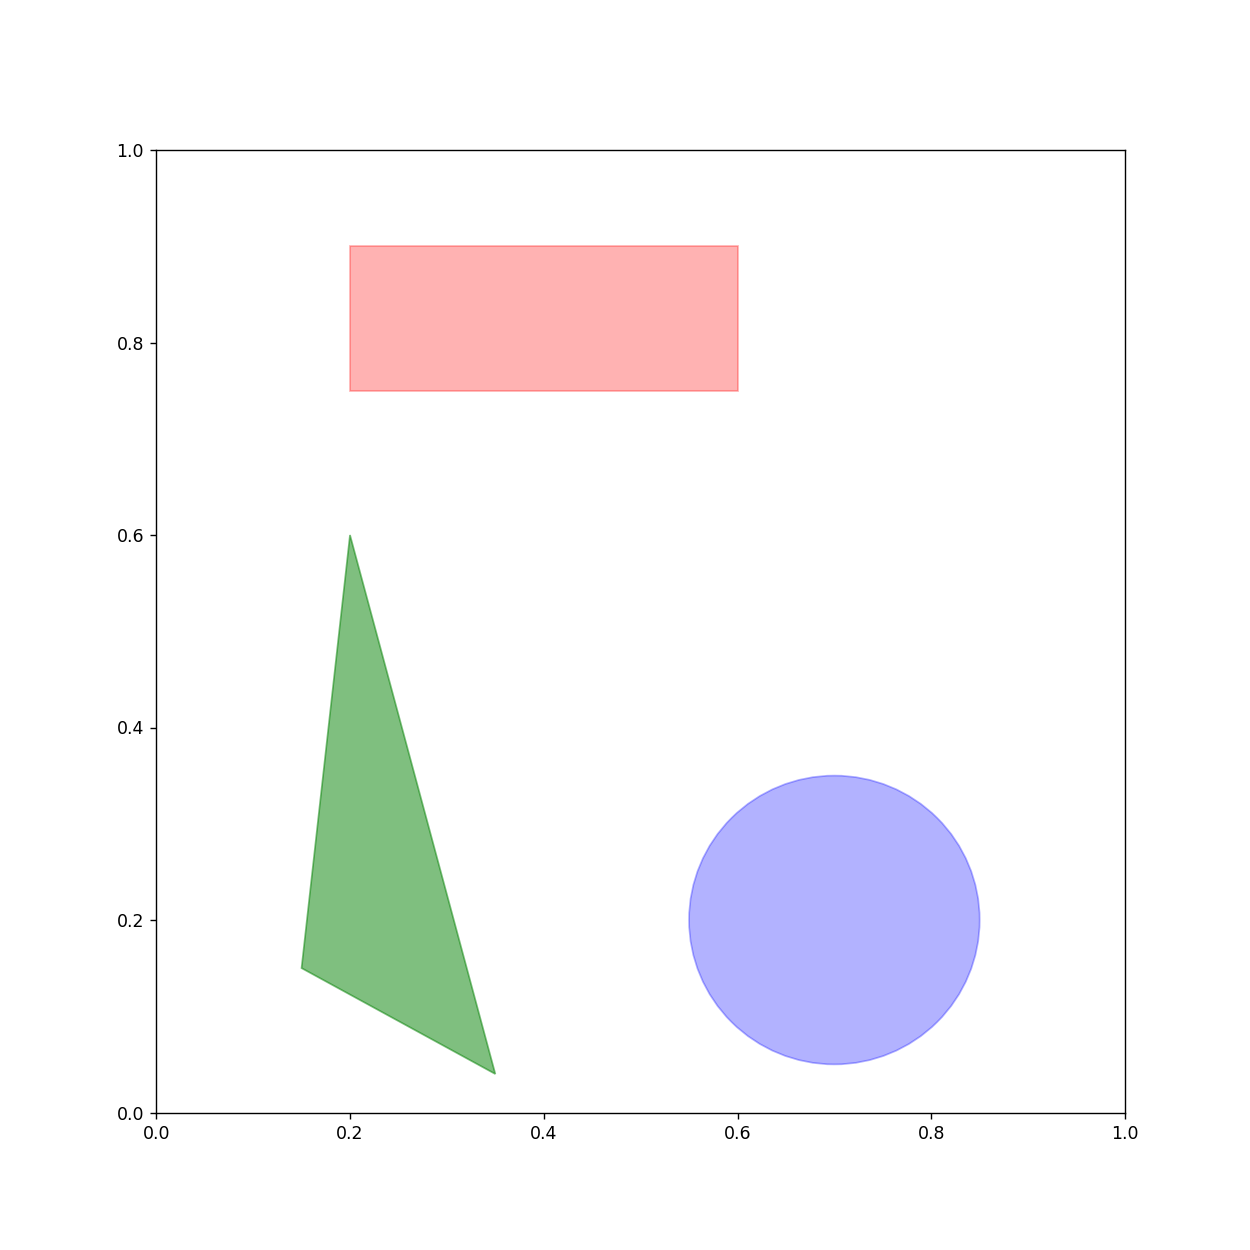

In [346]:
# 도형그리기

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='r',alpha=0.3)
circ = plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.04],[0.2,0.6]],color='g',alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 그림 파일로 저장하기

In [341]:
plt.savefig('figpath.svg') # pdf도 가능

In [342]:
# dpi : 인치당 도츠 해상도 조절
# bbox_inches : 실제 피규어의 둘레 공백을 잘라낸다.
plt.savefig('figpath.png',dpi=400,bbox_inches='tight')

In [343]:
from io import BytesIO # 파일과 유사한 객체
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib 설정

In [351]:
# 전체 그래프 크기를 지정하기
plt.rc('figure',figsize=(6,4))
# 여러가지 인자를 조절가능하다.

## pandas 에서 seaborn으로 그래프 그리기 

### 선그래프

<IPython.core.display.Javascript object>


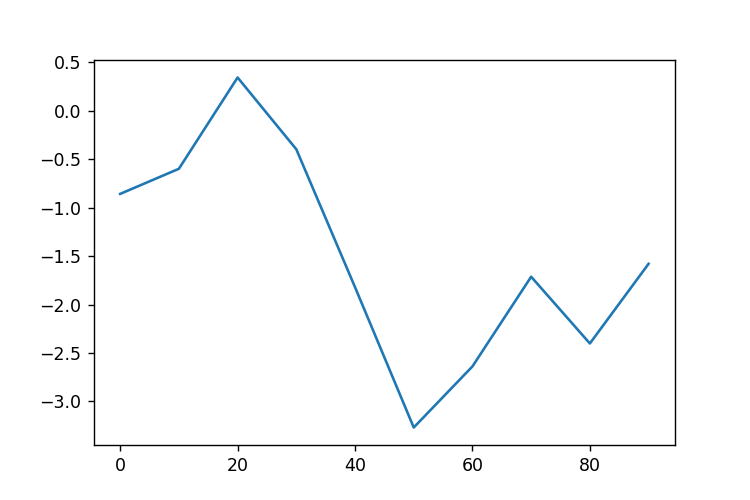

In [352]:
plt.figure()
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))

s.plot() # 선 그래프

<IPython.core.display.Javascript object>


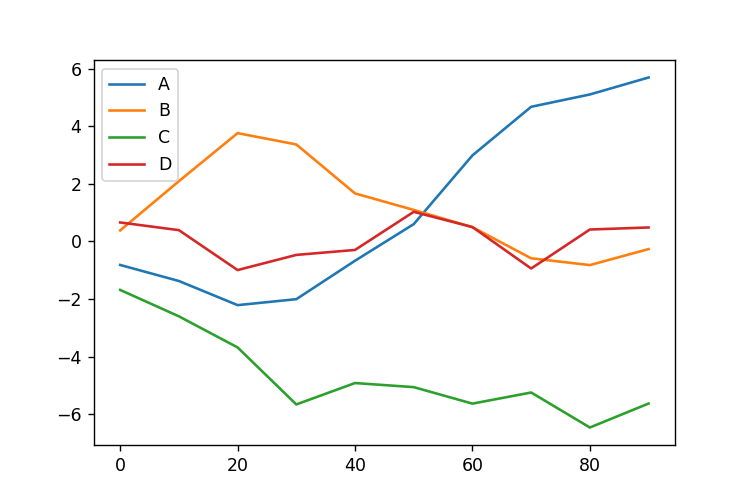

In [355]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B','C','D'],index=np.arange(0,100,10))
df.plot()

### 막대 그래프

In [ ]:
plot.bar() 수직 막대그래프
plot.barh() 수평 막대그래프

<IPython.core.display.Javascript object>


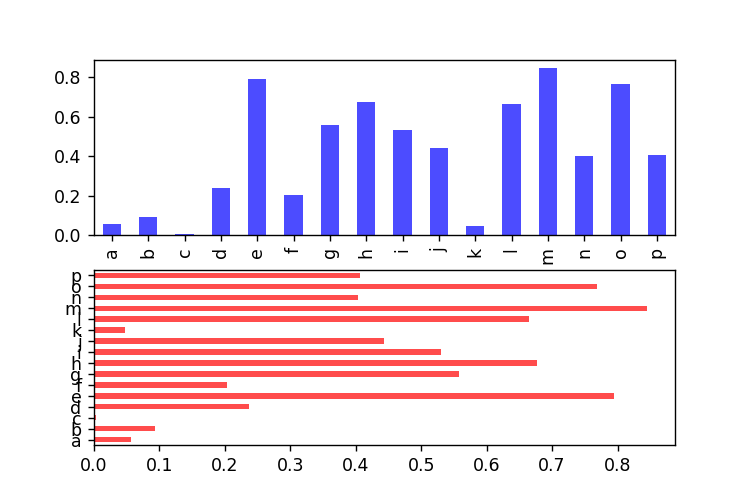

In [359]:
fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0],color='b',alpha=0.7)

data.plot.barh(ax=axes[1],color='r',alpha=0.7)

<IPython.core.display.Javascript object>


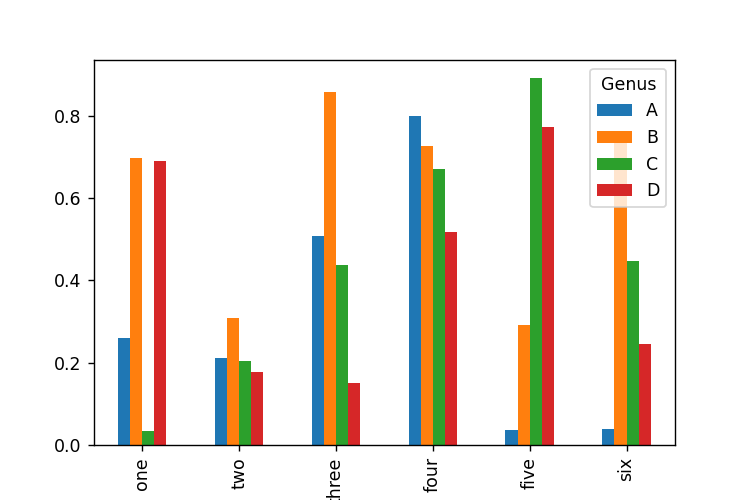

In [360]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df.plot.bar()

<IPython.core.display.Javascript object>


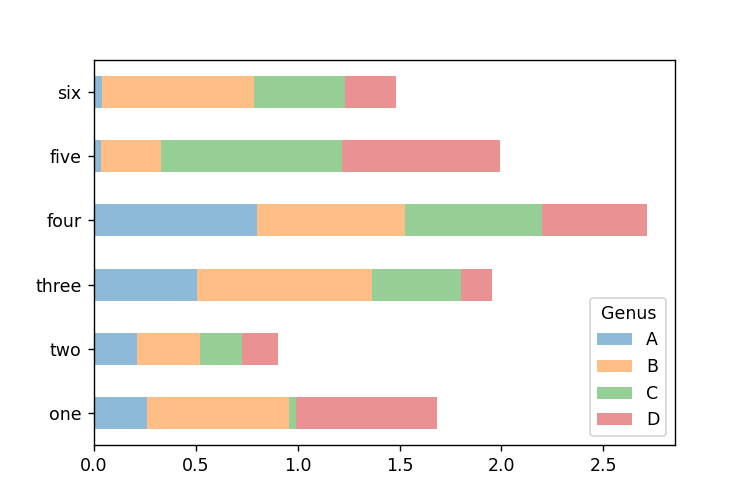

In [361]:
df.plot.barh(stacked=True,alpha=0.5)

In [362]:
tips = pd.read_csv('data/tips.csv')

In [365]:
party_count = pd.crosstab(tips['day'],tips['size'])
party_count

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [369]:
party_count = party_count.loc[:,2:5]
party_count

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [378]:
# 정규화
party_pcts = party_count.div(party_count.sum(1),axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


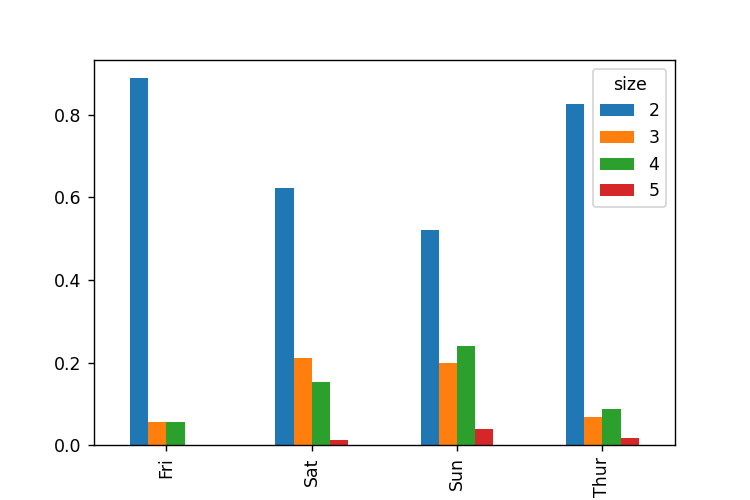

In [379]:
party_pcts.plot.bar()

In [375]:
import seaborn as sns

tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])

In [376]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


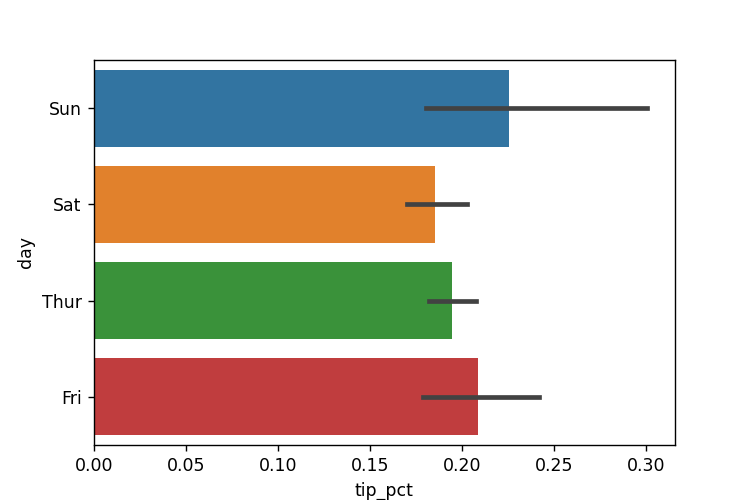

In [384]:
plt.figure()
sns.barplot(x='tip_pct',y='day',data=tips,orient='h') # orient : 방향 v, h

<IPython.core.display.Javascript object>


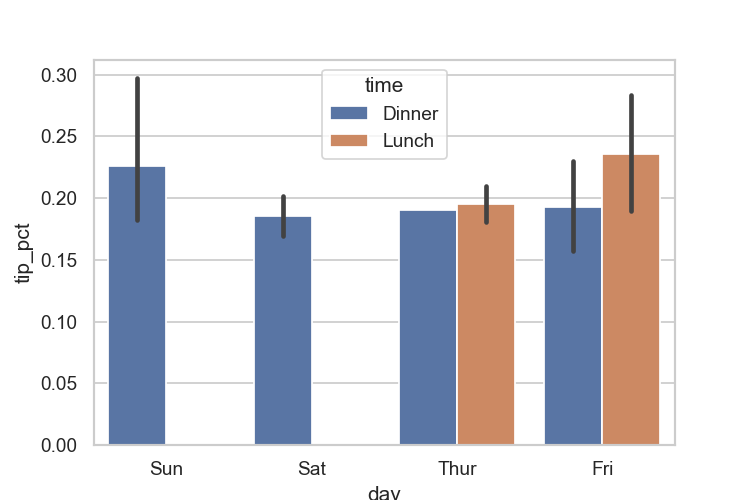

In [389]:
plt.figure()
sns.barplot(y='tip_pct',x='day',data=tips,orient='v',hue='time')

In [386]:
sns.set(style='whitegrid') # 격자생성

### 히스토그램과 밀도 그래프

<IPython.core.display.Javascript object>


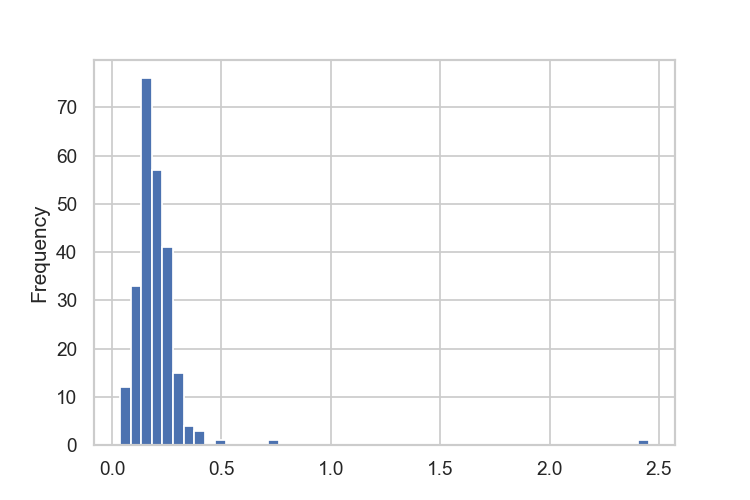

In [390]:
# 히스토그램
plt.figure()
tips['tip_pct'].plot.hist(bins=50)

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


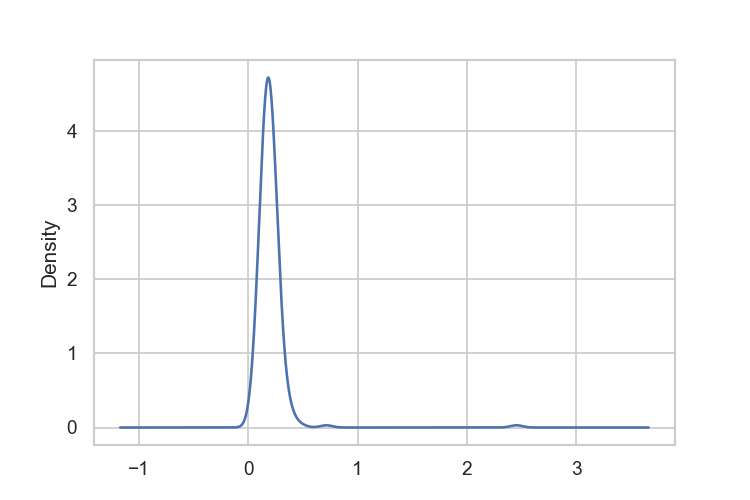

In [391]:
# 밀도함수
plt.figure()
tips['tip_pct'].plot.density()

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


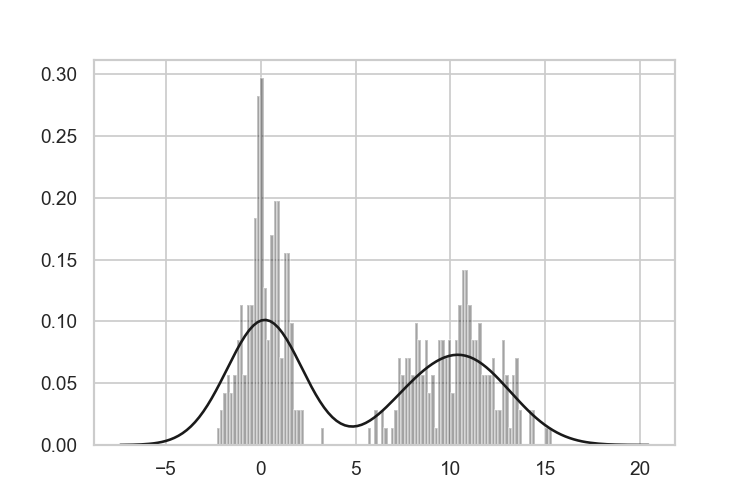

In [398]:
# 히스토그램과 밀도그래프 같이 그리기
plt.figure()
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))

sns.distplot(values,bins=100,color='k')

### 산포도

In [394]:
macro = pd.read_csv('data/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()

In [395]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


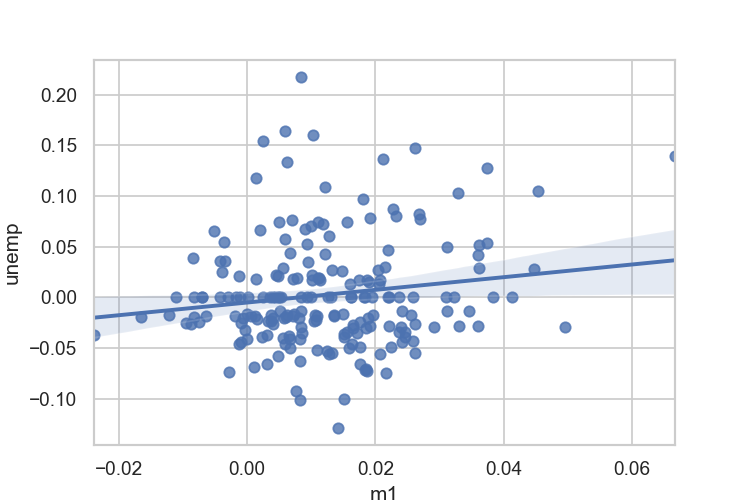

In [399]:
plt.figure()
sns.regplot('m1','unemp',data = trans_data)

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\axisgrid.py:1290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


<IPython.core.display.Javascript object>


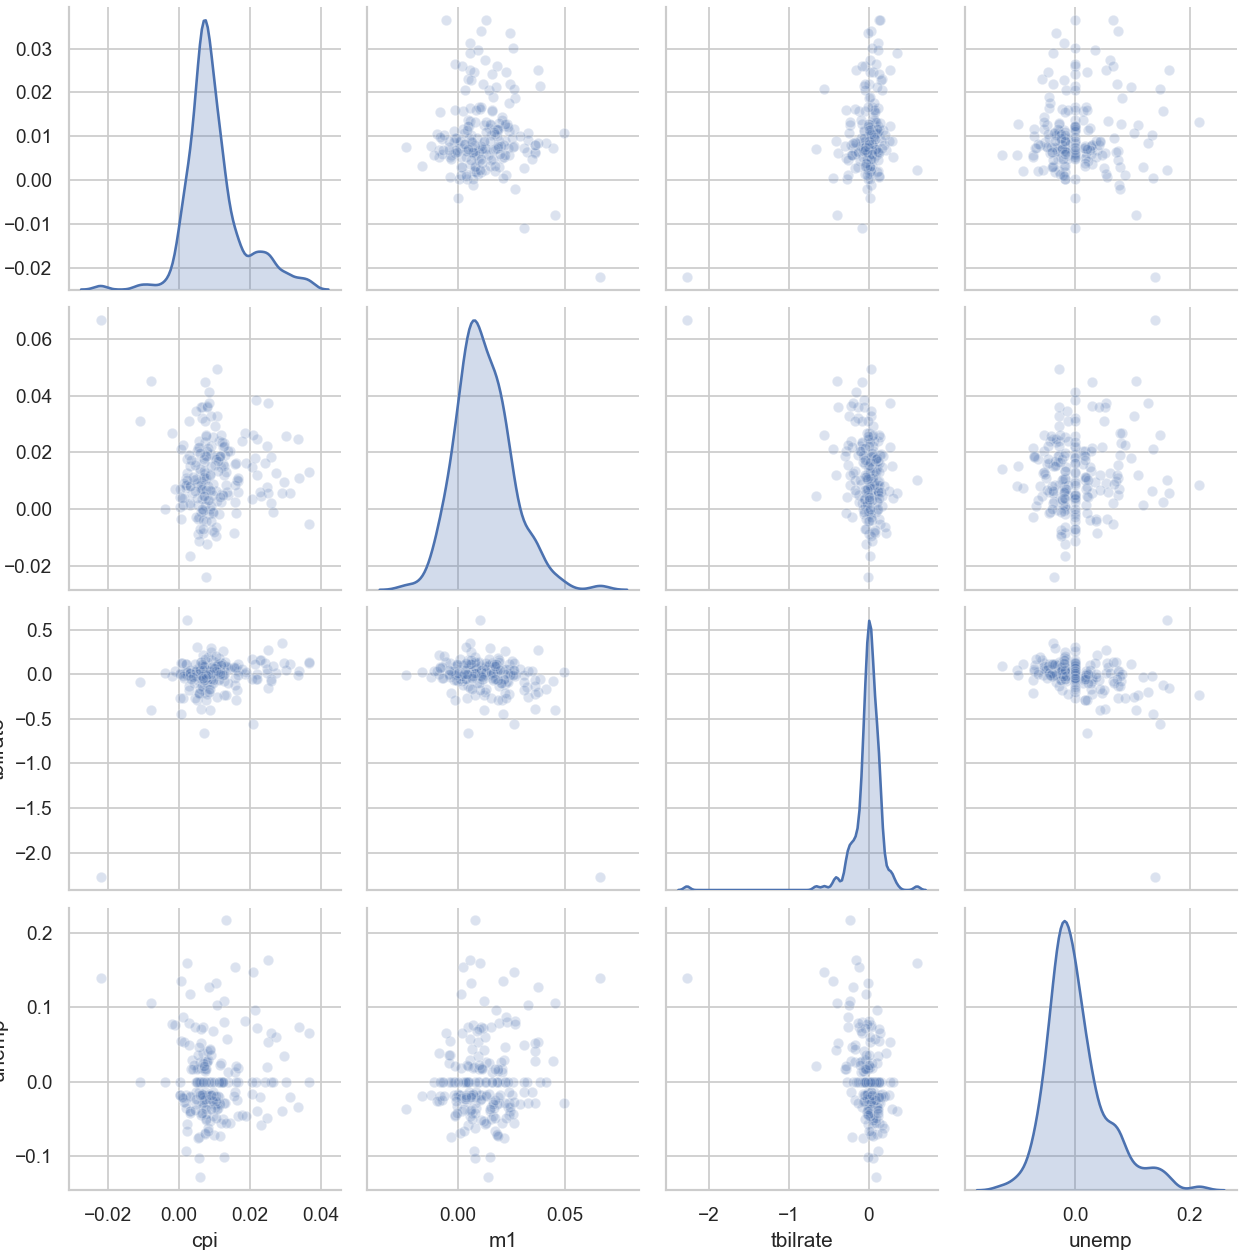

In [400]:
sns.pairplot(trans_data, diag_kind='kde',plot_kws={'alpha':0.2})

### 패싯 그리드와 범주형 데이터

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


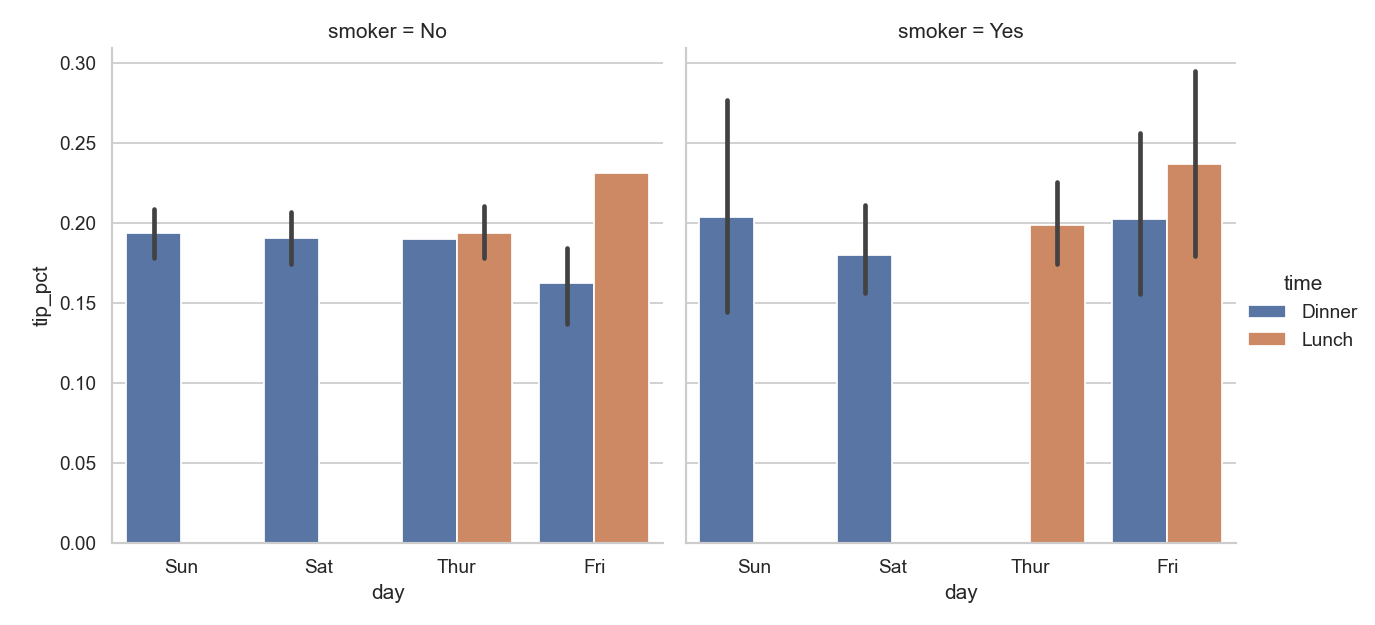

In [401]:
sns.factorplot(x='day',y='tip_pct', hue='time', col='smoker',kind='bar',data=tips[tips.tip_pct <1])

<IPython.core.display.Javascript object>


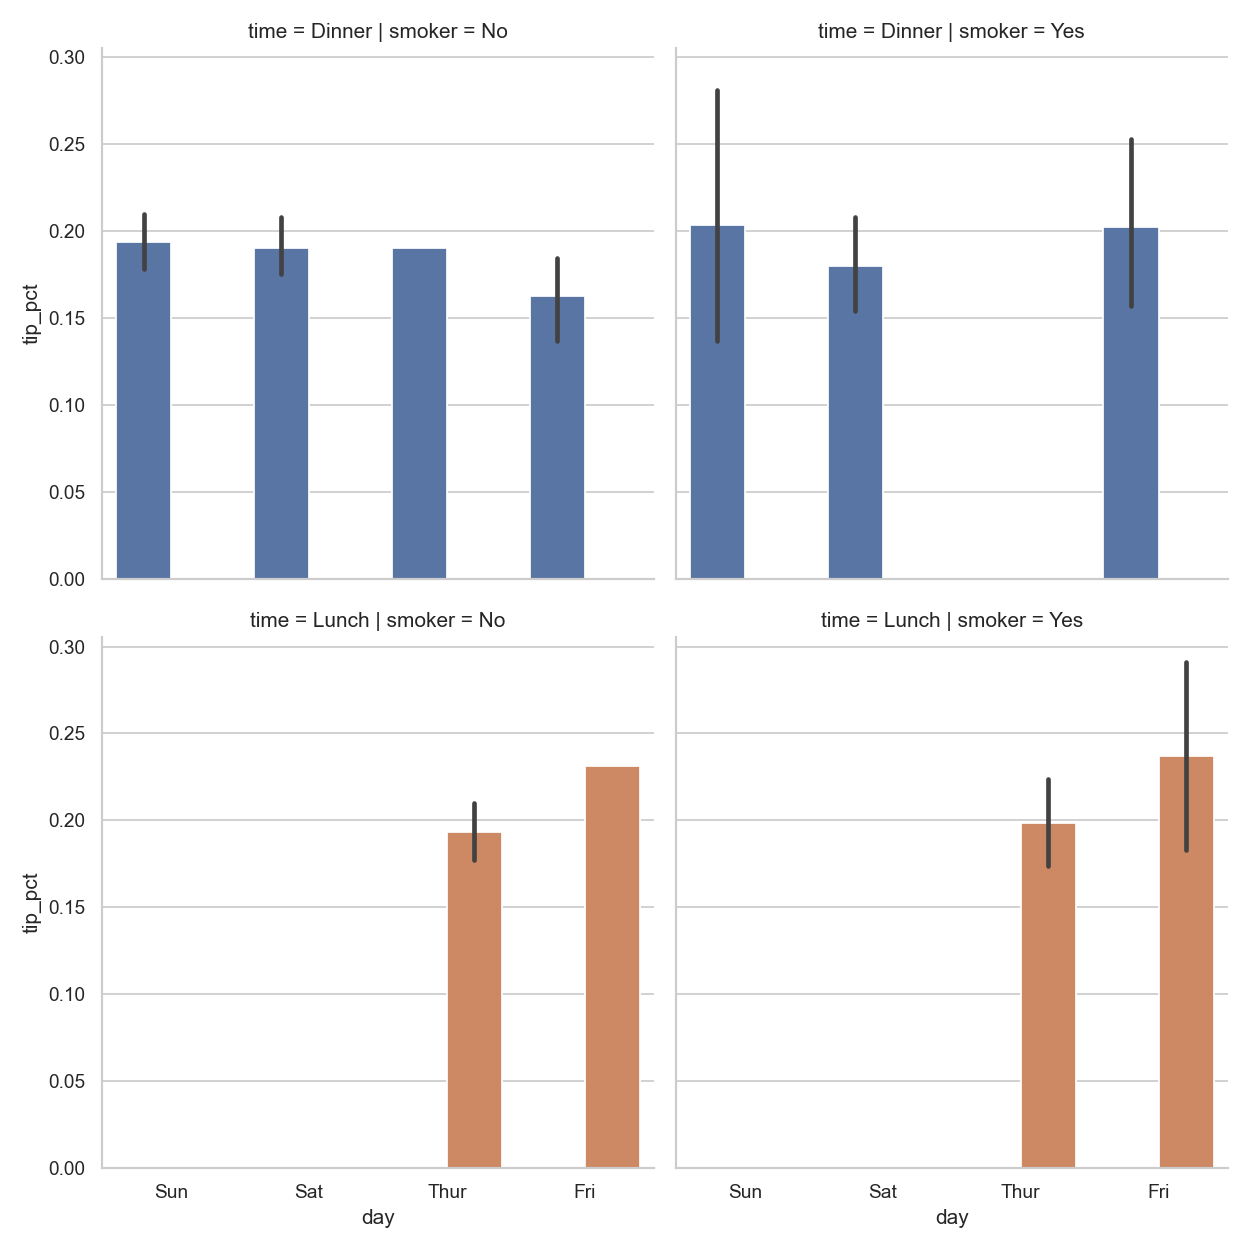

In [402]:
sns.factorplot(x='day',y='tip_pct', hue='time',row='time', col='smoker',kind='bar',data=tips[tips.tip_pct <1])

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


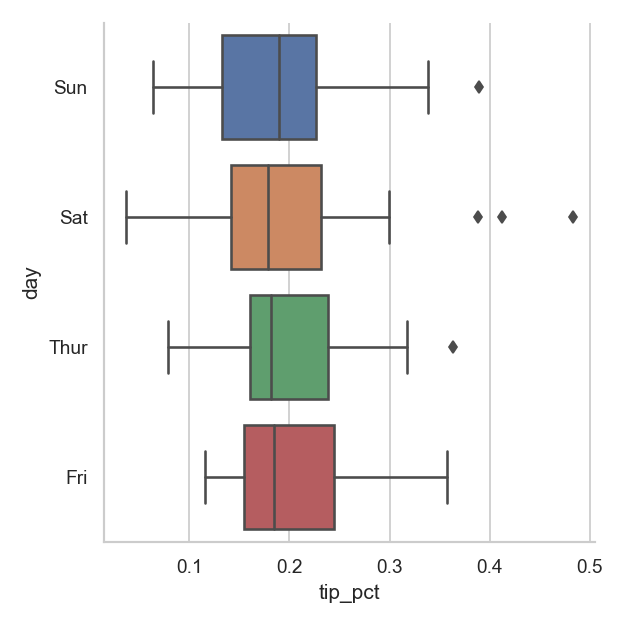

In [403]:
sns.factorplot(x='tip_pct',y='day',kind='box',data=tips[tips.tip_pct<0.5])